In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [28]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28 x 28 pixels
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True) 
# shffule good for training

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


In [29]:
# torch.Size([100, 1, 28, 28])
# [100, 1, 28, 28]
# 100 - We have 100 samples in a batch
#  1  - Only one channel because the images are not RGB it is WB.
# 28 x 28 - Image array

# torch.Size([100])
# So for each class label we have 1 value that is 100

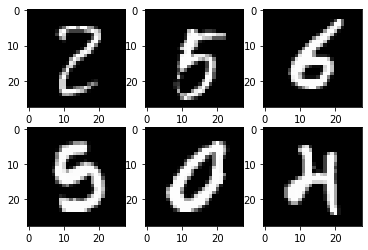

In [30]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [37]:
device = torch.device('cpu')

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

# loss nd optimizer
criterion = nn.CrossEntropyLoss() # this will apply softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
#         #forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
#         #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            


epoch 1 / 2, step 100/600, loss = 0.4829
epoch 1 / 2, step 200/600, loss = 0.2192
epoch 1 / 2, step 300/600, loss = 0.4227
epoch 1 / 2, step 400/600, loss = 0.1801
epoch 1 / 2, step 500/600, loss = 0.3341
epoch 1 / 2, step 600/600, loss = 0.3967
epoch 2 / 2, step 100/600, loss = 0.1297
epoch 2 / 2, step 200/600, loss = 0.1532
epoch 2 / 2, step 300/600, loss = 0.2894
epoch 2 / 2, step 400/600, loss = 0.2785
epoch 2 / 2, step 500/600, loss = 0.0571
epoch 2 / 2, step 600/600, loss = 0.2752


In [38]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100 * n_correct / n_samples
    
    print(f'Accuracy = {acc}')

Accuracy = 95.24
